In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dc-districts/police-districts-mpd.geojson
/kaggle/input/dc-crime-dataset-2021/DC Crime data 2021.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

**Reading the data**

In [14]:
data = pd.read_csv("/kaggle/input/dc-crime-dataset-2021/DC Crime data 2021.csv")
data.head(2)

X          Y       CCN              REPORT_DAT     SHIFT  METHOD  \
0 -76.971234  38.853023  21132080  2021/09/15 07:26:45+00  MIDNIGHT     GUN   
1 -77.032732  38.929525  21050701  2021/04/21 18:08:01+00       DAY  OTHERS   

                      OFFENSE                                BLOCK  \
0  ASSAULT W/DANGEROUS WEAPON   IRVING STREET SE AND 24TH PLACE SE   
1                 THEFT/OTHER  3100 - 3299 BLOCK OF 14TH STREET NW   

          XBLOCK         YBLOCK  ...  BLOCK_GROUP CENSUS_TRACT  \
0  402497.110016  131690.000024  ...     007408 2       7408.0   
1  397162.060000  140182.430000  ...     002802 1       2802.0   

   VOTING_PRECINCT   LATITUDE  LONGITUDE  BID              START_DATE  \
0     Precinct 115  38.853015 -76.971232  NaN  2021/09/15 02:56:00+00   
1      Precinct 39  38.929517 -77.032730  NaN  2021/04/21 16:52:32+00   

                 END_DATE   OBJECTID  OCTO_RECORD_ID  
0  2021/09/16 02:58:00+00  335627463             NaN  
1  2021/04/21 18:08:48+00  336138553             NaN  

[2 rows x 25 columns]

**Dropping the extra columns that are not required at the moment**

In [15]:
data.drop(labels=['X', 'Y', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],axis=1,inplace=True)

In [16]:
data.rename(columns = {'REPORT_DAT':'Date',}, inplace = True)

In [17]:
data.head()

CCN                    Date     SHIFT  METHOD  \
0  21132080  2021/09/15 07:26:45+00  MIDNIGHT     GUN   
1  21050701  2021/04/21 18:08:01+00       DAY  OTHERS   
2  21061917  2021/05/13 16:01:46+00       DAY  OTHERS   
3  21064560  2021/05/18 18:34:15+00       DAY  OTHERS   
4  21009939  2021/01/22 22:36:30+00   EVENING  OTHERS   

                      OFFENSE  DISTRICT   LATITUDE  LONGITUDE  
0  ASSAULT W/DANGEROUS WEAPON       7.0  38.853015 -76.971232  
1                 THEFT/OTHER       3.0  38.929517 -77.032730  
2                THEFT F/AUTO       4.0  38.952908 -77.031561  
3                 THEFT/OTHER       4.0  38.963764 -77.001400  
4                THEFT F/AUTO       3.0  38.923763 -77.028874

In [18]:
data.describe()

CCN      DISTRICT      LATITUDE     LONGITUDE
count  2.836400e+04  28185.000000  28364.000000  28364.000000
mean   2.110960e+07      3.660458     38.907805    -77.008514
std    4.868813e+05      1.840953      0.029712      0.034736
min    1.000888e+07      1.000000     38.819387    -77.110926
25%    2.105310e+07      2.000000     38.894993    -77.031788
50%    2.110266e+07      3.000000     38.907825    -77.012434
75%    2.114875e+07      5.000000     38.923968    -76.986909
max    9.915749e+07      7.000000     38.994217    -76.910012

In [19]:
crime_types=data.groupby(['OFFENSE'])['CCN'].count()
crime_types=pd.DataFrame(data=crime_types)
crime_types.head()

CCN
OFFENSE                         
ARSON                          4
ASSAULT W/DANGEROUS WEAPON  1664
BURGLARY                    1175
HOMICIDE                     224
MOTOR VEHICLE THEFT         3487

In [20]:
crime_types.rename(columns={"CCN":"Count"},inplace=True)
crime_types

Count
OFFENSE                          
ARSON                           4
ASSAULT W/DANGEROUS WEAPON   1664
BURGLARY                     1175
HOMICIDE                      224
MOTOR VEHICLE THEFT          3487
ROBBERY                      2045
SEX ABUSE                     180
THEFT F/AUTO                 8684
THEFT/OTHER                 10901

In [21]:
crime_types.reset_index(inplace=True)
crime_types

OFFENSE  Count
0                       ARSON      4
1  ASSAULT W/DANGEROUS WEAPON   1664
2                    BURGLARY   1175
3                    HOMICIDE    224
4         MOTOR VEHICLE THEFT   3487
5                     ROBBERY   2045
6                   SEX ABUSE    180
7                THEFT F/AUTO   8684
8                 THEFT/OTHER  10901

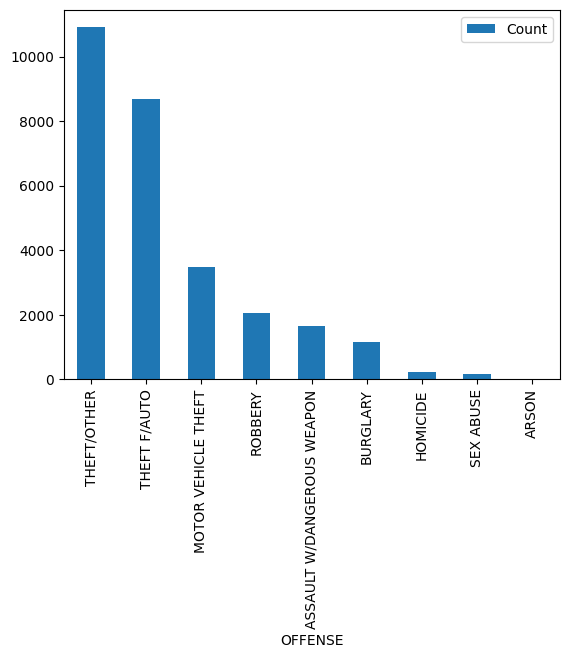

In [22]:
crime_types.sort_values(by='Count',inplace=True,ascending=False)
crime_types.plot(kind='bar',x='OFFENSE',y='Count')
#plt.figlegend(crime_types['OFFENSE'])
plt.show()

In [23]:
data['Date'] = pd.to_datetime(data['Date'])  # Converting 'Date' column to the appropriate type

data['Date_only'] = data['Date'].dt.date  # Extracting the date component
data['Time_only'] = data['Date'].dt.time  # Extracting the time component

data['Date_only'] = pd.to_datetime(data['Date_only'])  # Converting 'Date_only' column to the appropriate type
data['Day_of_Week'] = data['Date_only'].dt.day_name()  # Extracting the day of the week
data['Month'] = data['Date_only'].dt.month_name()  # Extracting the month

data.head()

CCN                      Date     SHIFT  METHOD  \
0  21132080 2021-09-15 07:26:45+00:00  MIDNIGHT     GUN   
1  21050701 2021-04-21 18:08:01+00:00       DAY  OTHERS   
2  21061917 2021-05-13 16:01:46+00:00       DAY  OTHERS   
3  21064560 2021-05-18 18:34:15+00:00       DAY  OTHERS   
4  21009939 2021-01-22 22:36:30+00:00   EVENING  OTHERS   

                      OFFENSE  DISTRICT   LATITUDE  LONGITUDE  Date_only  \
0  ASSAULT W/DANGEROUS WEAPON       7.0  38.853015 -76.971232 2021-09-15   
1                 THEFT/OTHER       3.0  38.929517 -77.032730 2021-04-21   
2                THEFT F/AUTO       4.0  38.952908 -77.031561 2021-05-13   
3                 THEFT/OTHER       4.0  38.963764 -77.001400 2021-05-18   
4                THEFT F/AUTO       3.0  38.923763 -77.028874 2021-01-22   

  Time_only Day_of_Week      Month  
0  07:26:45   Wednesday  September  
1  18:08:01   Wednesday      April  
2  16:01:46    Thursday        May  
3  18:34:15     Tuesday        May  
4  22:36:30      Friday    January

In [24]:
#Creating Time series data for total crimes
time_data=data.groupby(['Date_only'])['CCN'].count()
time_data=pd.DataFrame(data=time_data)
time_data.rename(columns={"CCN":"Crime Count"},inplace=True)
time_data.head()


Crime Count
Date_only              
2021-01-01           30
2021-01-02           67
2021-01-03           88
2021-01-04           61
2021-01-05           71

<function matplotlib.pyplot.show(close=None, block=None)>

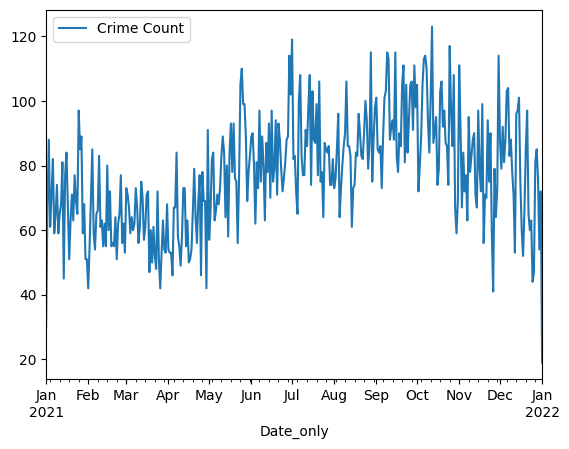

In [25]:
time_data.plot(kind='line')
plt.show

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


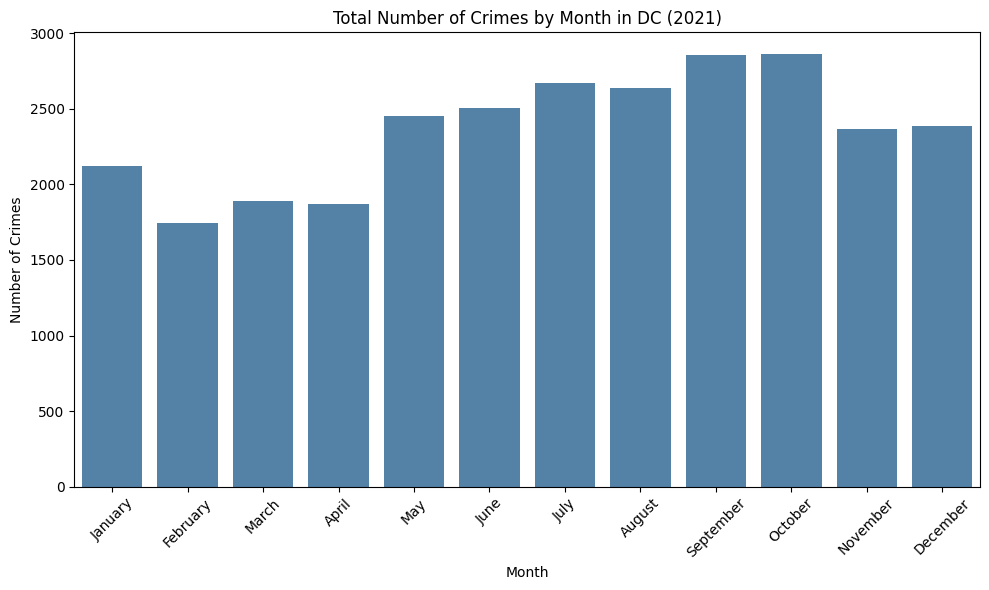

In [26]:
import seaborn as sns

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

crimes_by_month = data['Month'].value_counts().loc[month_order]

# Creating a bar plot for crimes by month
plt.figure(figsize=(10, 6)) 
sns.barplot(x=crimes_by_month.index, y=crimes_by_month.values, color='steelblue')  # Create the bar plot
plt.xlabel('Month')  
plt.ylabel('Number of Crimes')  
plt.title('Total Number of Crimes by Month in DC (2021)')  
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()  


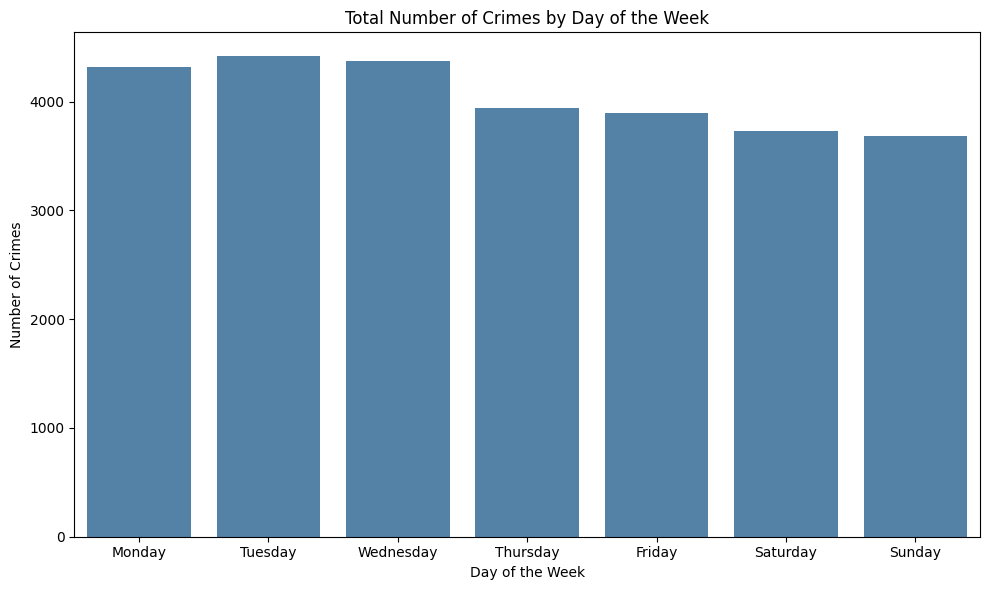

In [27]:

# Count the number of crimes by day of the week
crimes_by_day = data['Day_of_Week'].value_counts().loc[day_order]

# Create a bar plot for crimes by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=crimes_by_day.index, y=crimes_by_day.values, color='steelblue')  # Create the bar plot
plt.xlabel('Day of the Week')  
plt.ylabel('Number of Crimes')  
plt.title('Total Number of Crimes by Day of the Week')  
plt.tight_layout()  
plt.show()  

In [28]:
import folium
from folium.plugins import MarkerCluster

# Randomly sample a subset of data
sampled_data = data.sample(frac=0.1)  # Adjust the fraction as desired

# Create a map centered on Washington DC
dc_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Create a marker cluster group
marker_cluster = MarkerCluster().add_to(dc_map)

# Iterate over the sampled data
for index, row in sampled_data.iterrows():
    # Add a marker to the cluster group
    folium.Marker([row['LATITUDE'], row['LONGITUDE']],
                  popup=row['OFFENSE'],
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(marker_cluster)

# Display the map
dc_map


**Filtering for Violent crimes**

In [32]:
data['OFFENSE'].unique()

array(['ASSAULT W/DANGEROUS WEAPON', 'THEFT/OTHER', 'THEFT F/AUTO',
       'MOTOR VEHICLE THEFT', 'HOMICIDE', 'ROBBERY', 'BURGLARY',
       'SEX ABUSE', 'ARSON'], dtype=object)

In [38]:
violent_crimes = data[(data['OFFENSE'] == 'HOMICIDE') | (data['OFFENSE'] == 'SEX ABUSE')| (data['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON')]
violent_crimes.head()

CCN                      Date     SHIFT METHOD  \
0   21132080 2021-09-15 07:26:45+00:00  MIDNIGHT    GUN   
6   21009412 2021-01-21 05:00:00+00:00  MIDNIGHT    GUN   
13  21050058 2021-04-20 08:41:24+00:00  MIDNIGHT    GUN   
25  21063615 2021-05-16 22:18:11+00:00   EVENING  KNIFE   
66  21179209 2021-12-08 22:36:29+00:00   EVENING    GUN   

                       OFFENSE  DISTRICT   LATITUDE  LONGITUDE  Date_only  \
0   ASSAULT W/DANGEROUS WEAPON       7.0  38.853015 -76.971232 2021-09-15   
6                     HOMICIDE       7.0  38.825089 -77.001446 2021-01-21   
13  ASSAULT W/DANGEROUS WEAPON       4.0  38.943467 -77.036429 2021-04-20   
25  ASSAULT W/DANGEROUS WEAPON       5.0  38.899976 -76.982460 2021-05-16   
66  ASSAULT W/DANGEROUS WEAPON       6.0  38.896890 -76.934067 2021-12-08   

   Time_only Day_of_Week      Month  
0   07:26:45   Wednesday  September  
6   05:00:00    Thursday    January  
13  08:41:24     Tuesday      April  
25  22:18:11      Sunday        May  
66  22:36:29   Wednesday   December

In [52]:
import geopandas as gpd

dc_districts_geojson = '/kaggle/input/dc-districts/police-districts-mpd.geojson'
district_geo_data = gpd.read_file(dc_districts_geojson)

# Counting the number of crimes by district
district_crime_count = violent_crimes['DISTRICT'].value_counts().reset_index()
district_crime_count.columns = ['DISTRICT', 'CRIME_COUNT']

dc_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

folium.Choropleth(
    geo_data=district_geo_data,
    name='choropleth',
    data=district_crime_count,
    columns=['DISTRICT', 'CRIME_COUNT'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Crimes'
).add_to(dc_map)

folium.LayerControl().add_to(dc_map)
annotation = folium.Marker(location=[38.90040, -77.04856], popup=folium.Popup('George Washington University', max_width=300))
annotation.add_to(dc_map)

dc_map
